In [ ]:
'''
Pandas with IMDb data
'''

To install pandas package type: `conda install pandas` or `pip install pandas`. The usual way to import panadas is as the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here we also imported matplotlib since it will help us do some data visualization and numpy because pandas is heavily connected to and dependent on numpy.

Pandas is a library providing high-performance, easy-to-use data structures and data analysis tools. The easiest way to imagine it is like this: pandas is the combination of excel sheets and SQL databases in Python. It is more robust than Excel but not as fast or scalable as SQL. It has a strong focus on data analysis and visualization too. 

This is [Pandas website](https://pandas.pydata.org) and a collection of tutorials can be found [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html). 

## Pandas basics

### Datatypes in Pandas

There are two main datatypes in pandas. `pd.Series` and `pd.DataFrame`.

#### Series

Pandas Series is basically a (strictly) one dimensional vector with indecies. The index can be mostly anything and you can refer to the elements using those indeces. The vector elements have to have the same type. This kind of approach is very useful in timeseries data. You can create a series by passing a list to it.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8], index=['a', 'b', 'c', 'd', 'e', 'f']) 
print(s1)

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64


#### DataFrame

DataFrames are basically several Series put next to each other into different column, where the columns type can be different, like one column can have integer elements while the other only strings. We will mostly elaborate DataFrames because most of its rules are valid for the Series too. 

There are three main ways to create DataFrames (and a few more less common ways). First is to pass a numpy array as elements and optionally you can define the index and column names too:

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
column_name = ['AA','BB', 'CC', 'DD']
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=column_name)
df

,AA,BB,CC,DD
2013-01-01,-0.268324,2.324134,-0.480355,0.122346
2013-01-02,0.654584,-0.373509,-0.172703,-0.005380
2013-01-03,1.394733,0.035047,1.101184,-0.665039
2013-01-04,0.349033,0.044370,-0.802714,0.650896
2013-01-05,1.581446,-0.062609,0.306499,-0.468851
2013-01-06,-1.131022,-0.635134,-1.128090,0.639076


The second main way to define a dataframe is to pass a dictionary to the call, where the keys are the column names, the values are the elements of the columns. 

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'}, 
                  index=['first', 'second', 'third', 'fourth'])
df2

,A,B,C,D,E,F
first,1.0,2013-01-02,NaN,3,test,foo
second,1.0,2013-01-02,NaN,3,train,foo
third,1.0,2013-01-02,NaN,3,test,foo
fourth,1.0,2013-01-02,NaN,3,train,foo


Note that in the definition column F contains only one element while in the result that element is repeated (this is done automatically by pandas). Each column has to have the same number of rows. 

The third way is probably one of the most frequent way, when you read data from a file (like .csv) into a dataframe. Let's see that in action:

In [7]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
imdb_1000_data_url = r'imdb_1000.csv'
movies = pd.read_csv(imdb_1000_data_url, header=0, sep=',')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### View and investigate DataFrames

Here we go through the most common and useful methods that people use during their work with Pandas to get an insight on the data they are working with.

In [8]:
cols = list('ABC')
df = pd.DataFrame(np.cumsum(np.random.randn(100,3)+10, axis=1), columns=cols)
df.head()

,A,B,C
0,10.097718,18.890897,27.030888
1,9.928142,20.222866,29.609870
2,8.840214,18.348011,28.621286
3,11.908801,20.847033,31.202782
4,11.418284,21.340015,29.991604


In [9]:
df.tail(8)

,A,B,C
92,9.702749,21.334865,32.008060
93,10.103880,20.029960,30.817108
94,10.456289,22.291661,31.716206
95,9.513850,19.773842,29.989063
96,10.540738,19.500528,30.478436
97,10.941008,20.500220,29.373565
98,10.304220,20.054797,30.936563
99,9.229418,19.213768,29.709116


In [10]:
df.shape

(100, 3)

In [11]:
df.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,10.166621,19.954548,29.895032
std,1.035801,1.578428,1.786428
min,7.194974,16.690921,25.036609
25%,9.443517,18.842835,28.511154
50%,10.124740,19.954884,29.920031
75%,10.769456,21.225323,31.064939
max,13.016850,24.620936,34.196674


In [12]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [13]:
df.index

RangeIndex(start=0, stop=100, step=1)

### Manipulate DataFrames

There are many many ways to manipulate a DataFrame, just type `dir(df)` to see all the methods you can use on it. We will look at a few of them.

There are at least half a dozen `to_xxx` type of methods that are there to transform dataframes into another type of python type. Like `to_dict`:

In [14]:
df.to_dict()

{'A': {0: 10.09771821758986,
  1: 9.928142002581197,
  2: 8.840214157025496,
  3: 11.908801184409151,
  4: 11.418284128199945,
  5: 9.76853257400565,
  6: 10.130662823992921,
  7: 9.08273076669113,
  8: 9.260188127781891,
  9: 9.72430901728111,
  10: 9.992970781997098,
  11: 10.294223235087841,
  12: 10.028365293669303,
  13: 9.862002512109548,
  14: 10.748856148144284,
  15: 10.564889690992965,
  16: 10.447728272258777,
  17: 8.907951846236015,
  18: 10.832429438497371,
  19: 9.328103506083895,
  20: 10.864650591804894,
  21: 10.233734617084618,
  22: 11.23005063493447,
  23: 10.268175236740795,
  24: 12.475057576352985,
  25: 10.907122506878432,
  26: 9.21367494151785,
  27: 9.498809608932097,
  28: 10.118061155641891,
  29: 10.746752910047077,
  30: 8.997802249299655,
  31: 9.111980730739957,
  32: 10.543599766905515,
  33: 11.230825036354608,
  34: 11.099495770541552,
  35: 9.336975584965955,
  36: 11.865126480358173,
  37: 11.674478596571987,
  38: 9.945271747760339,
  39: 10.2895

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
A,10.097718,9.928142,8.840214,11.908801,11.418284,9.768533,10.130663,9.082731,9.260188,9.724309,...,8.478809,9.320968,9.702749,10.103880,10.456289,9.513850,10.540738,10.941008,10.304220,9.229418
B,18.890897,20.222866,18.348011,20.847033,21.340015,20.429702,19.144978,17.596383,18.017489,20.721562,...,18.853032,19.319313,21.334865,20.029960,22.291661,19.773842,19.500528,20.500220,20.054797,19.213768
C,27.030888,29.609870,28.621286,31.202782,29.991604,31.086977,29.906610,27.002131,26.523406,32.150056,...,27.405693,29.324792,32.008060,30.817108,31.716206,29.989063,30.478436,29.373565,30.936563,29.709116


Drop the column A (but the same is valid for rows, with different arguments):

In [16]:
df.drop(columns='A').head()

,B,C
0,18.890897,27.030888
1,20.222866,29.609870
2,18.348011,28.621286
3,20.847033,31.202782
4,21.340015,29.991604


You can easily add a new column to the dataframe:

In [42]:
df['text']=['one', 'two', np.nan, 'four'] * 25
df.head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one


Sort a column by its values:

In [43]:
df.sort_values(by='B', ascending=True).head()

,A,B,C,text
2011-02-01,9.111981,16.690921,27.824925,four
2011-01-18,8.907952,16.799900,27.012898,two
2011-02-12,7.438791,17.016964,28.520383,NaN
2011-03-16,8.668561,17.049756,25.036609,NaN
2011-02-20,7.194974,17.257948,27.030951,NaN


Note that by sorting by one column not just the other columns are moved but the index as well. 

Change index into dates.

In [44]:
dates = pd.date_range('2011-01-01', periods=100)

df=df.set_index(dates)
df.head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one


### Selection

There are many different ways you can select an element, column(s) or row(s). Depending on how you are doing the returned object can be a Series or a DataFrame. 

In [45]:
df['A'].head()

2011-01-01    10.097718
2011-01-02     9.928142
2011-01-03     8.840214
2011-01-04    11.908801
2011-01-05    11.418284
Freq: D, Name: A, dtype: float64

In [46]:
type(df['A'])

pandas.core.series.Series

In [47]:
df[['A']].head()

,A
2011-01-01,10.097718
2011-01-02,9.928142
2011-01-03,8.840214
2011-01-04,11.908801
2011-01-05,11.418284


In [48]:
type(df[['A']])

pandas.core.frame.DataFrame

You can use the from:to form of lists to select which rows you want to deal with:

In [49]:
df[0:3]

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN


The same can be achieved by referring to the index names:

In [50]:
df['2011-01-01':'2011-01-04']

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN
2011-01-04,11.908801,20.847033,31.202782,four


The previous two methods are selecting all the columns. If you want to do selection on columns too, you can use the `.loc` or `.iloc` methods. The former allows to refer to the index names, while the latter refers to the numbering of the index and columns. The `.iloc` slicing is very similar to the slicing in numpy. Here are two examples:

In [51]:
df.loc['2011-02-01':'2011-02-04', ['A','B']]

,A,B
2011-02-01,9.111981,16.690921
2011-02-02,10.543600,19.797448
2011-02-03,11.230825,23.015949
2011-02-04,11.099496,18.209158


In [52]:
df.iloc[0:2,:-2]

,A,B
2011-01-01,10.097718,18.890897
2011-01-02,9.928142,20.222866


Just as in numpy, you can do slicing with booleans. For example lets find out which row contains numbers between 10 and 11 in column A:

In [66]:
df[(df['A']>10) & (df['A']<11)].head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-07,10.130663,19.144978,29.906610,NaN
2011-01-12,10.294223,19.866178,29.933451,four
2011-01-13,10.028365,17.811800,28.041256,one
2011-01-15,10.748856,20.065713,30.157760,NaN


In [67]:
df[df.text.isin(['one','four'])].head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one
2011-01-08,9.082731,17.596383,27.002131,four
2011-01-09,9.260188,18.017489,26.523406,one


If the dataframe has missing data, you can drop them or fill them with something else. 

In [68]:
df.dropna(how='any').head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one
2011-01-06,9.768533,20.429702,31.086977,two


In [69]:
df.fillna(value='HELLO').head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,HELLO
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one


### Operations

Pandas allows you to simply do some arithmetics and stats. 

In [70]:
df.mean()

A    10.166621
B    19.954548
C    29.895032
dtype: float64

In [72]:
df.mean(axis=1).head()

2011-01-01    18.673168
2011-01-02    19.920293
2011-01-03    18.603170
2011-01-04    21.319539
2011-01-05    20.916634
Freq: D, dtype: float64

In [73]:
df.shift(2).head()

,A,B,C,text
2011-01-01,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN
2011-01-03,10.097718,18.890897,27.030888,one
2011-01-04,9.928142,20.222866,29.609870,two
2011-01-05,8.840214,18.348011,28.621286,NaN


In pandas it is very simply to apply rolling functions with the `rolling` method.

In [77]:
df.A.rolling(3).std().head()

2011-01-01         NaN
2011-01-02         NaN
2011-01-03    0.682356
2011-01-04    1.555786
2011-01-05    1.648397
Freq: D, Name: A, dtype: float64

Using the apply method one can apply any self defined function.

In [79]:
df[['A','B','C']].apply(np.cumsum).head()

,A,B,C
2011-01-01,10.097718,18.890897,27.030888
2011-01-02,20.025860,39.113763,56.640758
2011-01-03,28.866074,57.461774,85.262044
2011-01-04,40.774876,78.308807,116.464826
2011-01-05,52.193160,99.648822,146.456430


In [81]:
df[['A','B','C']].apply(lambda x: x.max() - x.min())

A    5.821876
B    7.930015
C    9.160065
dtype: float64

### Grouping

In pandas you can perform certain calculation by grouping column values into groups and performing the calculation:

In [83]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.865314,0.725929
1,bar,one,0.375642,-0.349524
2,foo,two,0.398891,-0.753096
3,bar,three,0.037671,0.491434
4,foo,two,0.839007,0.723922
5,bar,two,0.350637,-0.863987
6,foo,one,-1.328683,0.063337
7,foo,three,-0.324676,0.968039


In [84]:
df.groupby('A').count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [85]:
df.groupby('B').sum()

,C,D
B,,
one,-0.087727,0.439742
three,-0.287005,1.459473
two,1.588536,-0.893161


In [87]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.375642 -0.349524
    three  0.037671  0.491434
    two    0.350637 -0.863987
foo one   -0.231684  0.394633
    three -0.324676  0.968039
    two    0.618949 -0.014587

### Merging

Pandas is got to do some SQL like joining and merging.

In [92]:
left = pd.DataFrame({'key': ['foo', 'bar', 'egg'], 'lval': [1, 2,3]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)

   key  lval
0  foo     1
1  bar     2
2  egg     3
   key  rval
0  foo     4
1  bar     5


In [94]:
left.merge(right, on='key', how='outer')

,key,lval,rval
0,foo,1,4.0
1,bar,2,5.0
2,egg,3,NaN


In [95]:
left.merge(right, on='key', how='inner')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Plotting

Pandas provide an easy way to plot its content:

In [97]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000),
                      columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01-01,1.250402,1.222400,-0.527586,0.214427
2000-01-02,0.419948,-0.435627,-0.300416,0.171833
2000-01-03,1.453534,0.489392,-0.579825,-0.601518
2000-01-04,1.009457,-0.014010,-0.232209,-0.362395
2000-01-05,-0.573379,0.849379,-0.580498,0.082800


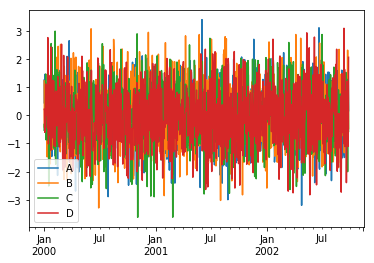

In [98]:
df.plot()

In [99]:
df=df.cumsum()

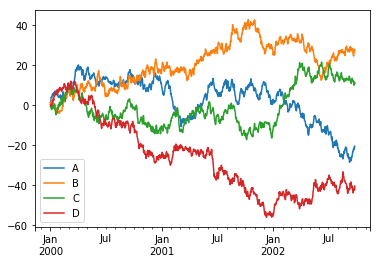

In [100]:
df.plot()

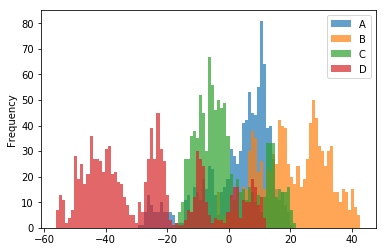

In [102]:
df.plot(kind='hist', alpha=0.7, bins=100)

## Pandas real life application

In [103]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [263]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
# calculate the average movie duration
movies['duration'].mean()

120.97957099080695

In [104]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values('duration').head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


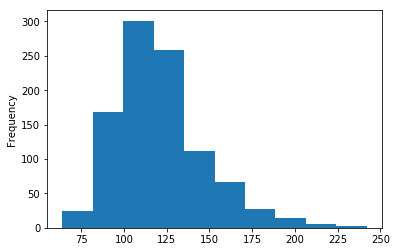

In [11]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies['duration'].plot(kind='hist', bins=10)

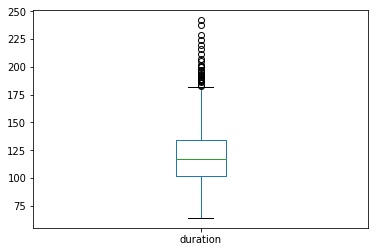

In [12]:
# use a box plot to display that same data
movies['duration'].plot(kind='box')

In [116]:
# count how many movies have each of the content ratings
movies[['content_rating','title']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,125
PG-13,190
R,460


Text(0,0.5,'Title Count')

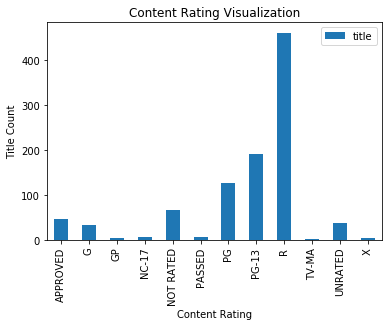

In [115]:
# use a visualization to display that same data, including a title and x and y labels #fontsize=25
movies[['content_rating','title']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

#### convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP


In [35]:
# convert the following content ratings to "NC-17": X, TV-MA
movies['content_rating'].replace(['X','TV-MA'],'NC-17')#.head()

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

In [110]:
# count the number of missing values in each column
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [46]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies['content_rating'].isnull()]
movies.at[(187,649),'content_rating'] = 'PG'
movies.at[936,'content_rating'] = 'PG-13'

In [8]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours

#movies[movies['duration'] < 120]['star_rating'].mean()

print('Avg. star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(), 
      '\nAvg. star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())

Avg. star rating for movies 2 hours or longer:  7.948898678414082 
Avg. star rating for movies shorter than 2 hours:  7.838666666666657


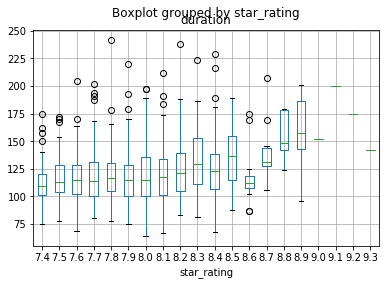

In [7]:
# use a visualization to detect whether there is a relationship between duration and star rating
#movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.3)
#movies.hist(column='duration', by='star_rating', sharex=True, sharey=True);
movies.boxplot(column='duration', by='star_rating');

In [34]:
# calculate the average duration for each genre
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


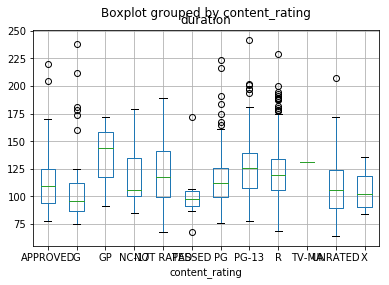

In [145]:
# visualize the relationship between content rating and duration
#movies[['content_rating','duration']].plot(kind='box')
movies.boxplot(column='duration', by='content_rating')

In [81]:
# determine the top rated movie (by star rating) for each genre
movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


In [100]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [45]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [44]:
# Figure out something "interesting" using the actors data
# Which actor did how many movies


def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
    
movies_series = movies['actors_list'].apply(repp)

actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])
    
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

actor_dict

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gunton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Duvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thurman': 5,
 'Samuel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 14,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaughey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Louise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshir\\xf4 Mifune': 3,
 'Takashi Shimura': 2